# Running Unsplit Model in R

In [4]:
library("nlme")
library("mgcv")
library("tidyverse")
library("stringr") 
library("plot3D")
library("corrplot")

Warning message:
"package 'corrplot' was built under R version 4.1.2"
corrplot 0.92 loaded



## Comparing Imputations Methods

### Model Using KNN Imputations 

In [16]:
knn_dat = read_delim('violenceKNN.csv', delim = ",") %>% select(-c(1))

New names:
* `` -> ...1

Rows: 122 Columns: 10

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): sitename
dbl (9): ...1, year, violenceScore, AllAgesInPovertyPercent, UnderAge18InPov...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [26]:
mod_knn = lme(violenceScore ~  ., random = ~ 1 | sitename, method = "ML", data = knn_dat)

knn_AIC = AIC(mod_knn)

[1] 870.5572

### Model Using Mean Imputations 

In [31]:
mean_dat = read_delim('violenceMean.csv', delim = ",") %>% 
transmute(year = year, sitename = sitename, violenceScore = `violence score`, 
          AllAgesInPovertyPercent = `All Ages in Poverty Percent`, 
          UnderAge18InPovertyPercent = `Under Age 18 in Poverty Percent`, 
          MedianHouseholdIncomeInDollars = `Median Household Income in Dollars`, 
          UnemploymentRate = `Unemployment Rate`, Population = Population, 
          SNAP = `SNAP($/Person)`)

New names:
* `` -> ...1

Rows: 122 Columns: 10

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): sitename
dbl (8): ...1, year, violence score, All Ages in Poverty Percent, Under Age ...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [33]:
mod_mean = lme(violenceScore ~  ., random = ~ 1 | sitename, method = "ML", data = mean_dat)

mean_AIC = AIC(mod_mean)

[1] 870.2683

### Model Using Median Imputations 

In [48]:
med_dat = read_delim('violenceMedian.csv', delim = ",") %>% select(-c(1))

New names:
* `` -> ...1

Rows: 122 Columns: 10

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): sitename
dbl (8): ...1, year, violenceScore, AllAgesInPovertyPercent, UnderAge18InPov...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [49]:
mod_med = lme(violenceScore ~  ., random = ~ 1 | sitename, method = "ML", data = med_dat)

med_AIC = AIC(mod_med)

[1] 863.7171

### Model Using Mode Imputations 

In [42]:
mode_dat = read_delim('violenceMode.csv', delim = ",") %>% select(-c(1))

New names:
* `` -> ...1

Rows: 122 Columns: 10

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): sitename
dbl (8): ...1, year, violenceScore, AllAgesInPovertyPercent, UnderAge18InPov...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [45]:
mod_mode = lme(violenceScore ~  ., random = ~ 1 | sitename, method = "ML", data = mode_dat)

mode_AIC = AIC(mod_mode)

[1] 863.7171

### Compare Imputations Using AIC

In [51]:
AIC_mat = matrix(c(knn_AIC, mean_AIC, med_AIC, mode_AIC), nrow = 4)

rowNames = c("KNN AIC", "Mean AIC", "Median AIC", "Mode AIC")
row.names(AIC_mat) = rowNames

AIC_mat

KNN AIC,870.5572
Mean AIC,870.2683
Median AIC,863.7171
Mode AIC,863.7171


## Finding Best Model

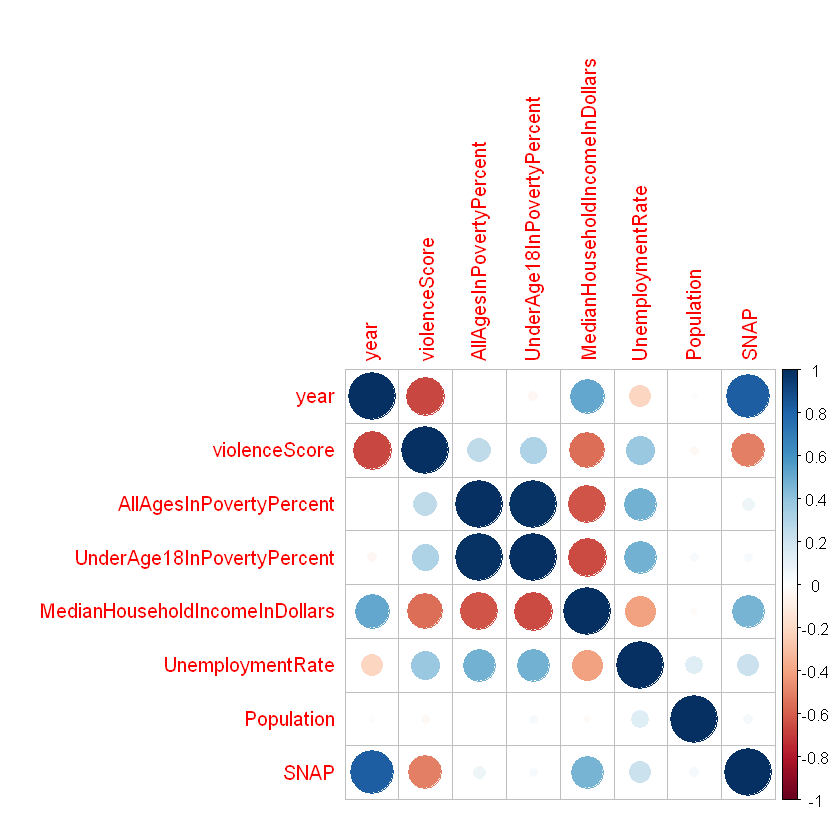

In [72]:
# Correlation plot for all variables
dat_cor = cor(knn_dat[,-c(2)])

corrplot(dat_cor, method="circle")

In [53]:
# All predictors
full_model = lme(violenceScore ~  ., random = ~ 1 | sitename, method = "ML", data = knn_dat)
full_AIC = AIC(full_model)

In [64]:
# Using AllAgesInPovertyPercent, not using UnderAge18InPovertyPercent
# Dropping 1

# Without year
mod1 = lme(violenceScore ~ AllAgesInPovertyPercent + MedianHouseholdIncomeInDollars + UnemploymentRate + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod1_AIC = AIC(mod1)

# Without AllAgesInPovertyPercent
mod2 = lme(violenceScore ~ year + MedianHouseholdIncomeInDollars + UnemploymentRate + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod2_AIC = AIC(mod2)

# Without MedianHouseholdIncomeInDollars
mod3 = lme(violenceScore ~ year + AllAgesInPovertyPercent + UnemploymentRate + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod3_AIC = AIC(mod3)

# Without UnemploymentRate
mod4 = lme(violenceScore ~ year + AllAgesInPovertyPercent + MedianHouseholdIncomeInDollars + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod4_AIC = AIC(mod4)

# Without Population
mod5 = lme(violenceScore ~ year + AllAgesInPovertyPercent + MedianHouseholdIncomeInDollars + UnemploymentRate + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod5_AIC = AIC(mod5)

# Without SNAP
mod6 = lme(violenceScore ~ year + AllAgesInPovertyPercent + MedianHouseholdIncomeInDollars + UnemploymentRate + Population, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod6_AIC = AIC(mod6)

AIC_mat = matrix(c(mod1_AIC, mod2_AIC, mod3_AIC, mod4_AIC, mod5_AIC, mod6_AIC), nrow = 6)

rowNames = c("Without Year", "Without AllAgesInPovertyPercent", 
             "Without MedianHouseholdIncomeInDollars", "Without UnemploymentRate", 
             "Without Population", "Without SNAP")
row.names(AIC_mat) = rowNames

AIC_mat

Without Year,795.0217
Without AllAgesInPovertyPercent,786.3369
Without MedianHouseholdIncomeInDollars,786.3986
Without UnemploymentRate,789.3896
Without Population,786.5969
Without SNAP,786.5085


In [63]:
# Using UnderAge18InPovertyPercent, not using AllAgesInPovertyPercent
# Dropping 1

# Without year
mod1 = lme(violenceScore ~ UnderAge18InPovertyPercent + MedianHouseholdIncomeInDollars + UnemploymentRate + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod1_AIC = AIC(mod1)

# Without UnderAge18InPovertyPercent
mod2 = lme(violenceScore ~ year + MedianHouseholdIncomeInDollars + UnemploymentRate + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod2_AIC = AIC(mod2)

# Without MedianHouseholdIncomeInDollars
mod3 = lme(violenceScore ~ year + UnderAge18InPovertyPercent + UnemploymentRate + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod3_AIC = AIC(mod3)

# Without UnemploymentRate
mod4 = lme(violenceScore ~ year + UnderAge18InPovertyPercent + MedianHouseholdIncomeInDollars + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod4_AIC = AIC(mod4)

# Without Population
mod5 = lme(violenceScore ~ year + UnderAge18InPovertyPercent + MedianHouseholdIncomeInDollars + UnemploymentRate + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod5_AIC = AIC(mod5)

# Without SNAP
mod6 = lme(violenceScore ~ year + UnderAge18InPovertyPercent + MedianHouseholdIncomeInDollars + UnemploymentRate + Population, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod6_AIC = AIC(mod6)

AIC_mat = matrix(c(mod1_AIC, mod2_AIC, mod3_AIC, mod4_AIC, mod5_AIC, mod6_AIC), nrow = 6)

rowNames = c("Without Year", "Without UnderAge18InPovertyPercent", 
             "Without MedianHouseholdIncomeInDollars", "Without UnemploymentRate", 
             "Without Population", "Without SNAP")
row.names(AIC_mat) = rowNames

AIC_mat

Without Year,795.3887
Without UnderAge18InPovertyPercent,786.3369
Without MedianHouseholdIncomeInDollars,786.1210
Without UnemploymentRate,788.8940
Without Population,786.3897
Without SNAP,786.3180


In [69]:
# Without year
mod1 = lme(violenceScore ~ UnderAge18InPovertyPercent + UnemploymentRate + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod1_AIC = AIC(mod1)

# Without UnderAge18InPovertyPercent
mod2 = lme(violenceScore ~ year + UnemploymentRate + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod2_AIC = AIC(mod2)

# Without UnemploymentRate
mod3 = lme(violenceScore ~ year + UnderAge18InPovertyPercent + Population + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod3_AIC = AIC(mod3)

# Without Population
mod4 = lme(violenceScore ~ year + UnderAge18InPovertyPercent + UnemploymentRate + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod4_AIC = AIC(mod4)

# Without SNAP
mod5 = lme(violenceScore ~ year + UnderAge18InPovertyPercent + UnemploymentRate + Population, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod5_AIC = AIC(mod5)


AIC_mat = matrix(c(mod1_AIC, mod2_AIC, mod3_AIC, mod4_AIC, mod5_AIC), nrow = 5)

rowNames = c("Without Year", "Without UnderAge18InPovertyPercent", 
             "Without UnemploymentRate", 
             "Without Population", "Without SNAP")
row.names(AIC_mat) = rowNames

AIC_mat

Without Year,793.9079
Without UnderAge18InPovertyPercent,784.4153
Without UnemploymentRate,786.9653
Without Population,784.3899
Without SNAP,784.3269


In [83]:
mod1 = lme(violenceScore ~ year + UnemploymentRate + Population + UnderAge18InPovertyPercent, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod1_AIC = AIC(mod1)

mod2 = lme(violenceScore ~ year + UnemploymentRate + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod2_AIC = AIC(mod2)

mod3 = lme(violenceScore ~ year + UnemploymentRate + Population, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod3_AIC = AIC(mod3)

mod4 = lme(violenceScore ~ year + UnemploymentRate + MedianHouseholdIncomeInDollars, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod4_AIC = AIC(mod4)

mod5 = lme(violenceScore ~ year + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod5_AIC = AIC(mod5)

mod6 = lme(violenceScore ~ UnemploymentRate + Population, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod6_AIC = AIC(mod6)

mod7 = lme(violenceScore ~ UnemploymentRate + UnderAge18InPovertyPercent, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod7_AIC = AIC(mod7)

mod8 = lme(violenceScore ~ UnemploymentRate + SNAP, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod8_AIC = AIC(mod8)

mod9 = lme(violenceScore ~ UnemploymentRate + SNAP + MedianHouseholdIncomeInDollars, random = ~ 1 | sitename, method = "ML", data = knn_dat)
mod9_AIC = AIC(mod9)

AIC_mat = matrix(c(mod1_AIC, mod2_AIC, mod3_AIC, mod4_AIC, mod5_AIC, mod6_AIC, mod7_AIC, mod8_AIC, mod9_AIC), nrow = 9)

rowNames = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model 6", "Model 7", "Model 8", "Model 9")
row.names(AIC_mat) = rowNames

AIC_mat

Model 1,784.3269
Model 2,782.6588
Model 3,782.6094
Model 4,782.7435
Model 5,780.8245
Model 6,860.3841
Model 7,860.0038
Model 8,790.7013
Model 9,792.1113


In [112]:
#### Comparing Impuatations Again

# Using year and UnemploymentRate
mod_knn_1 = lme(violenceScore ~  year + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = knn_dat)
knn_AIC_1 = AIC(mod_knn_1)

mod_mean_1 = lme(violenceScore ~  year + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = mean_dat)
mean_AIC_1 = AIC(mod_mean_1)

mod_med_1 = lme(violenceScore ~  year + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = med_dat)
med_AIC_1 = AIC(mod_med_1)

mod_mode_1 = lme(violenceScore ~  year + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = mode_dat)
mode_AIC_1 = AIC(mod_mode_1)

AIC_mat_1 = matrix(c(knn_AIC_1, mean_AIC_1, med_AIC_1, mode_AIC_1), nrow = 4)

rowNames_1 = c("KNN AIC", "Mean AIC", "Median AIC", "Mode AIC")
row.names(AIC_mat_1) = rowNames_1

AIC_mat_1

# Using UnemploymentRate and SNAP
mod_knn_2 = lme(violenceScore ~  SNAP + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = knn_dat)
knn_AIC_2 = AIC(mod_knn_2)

mod_mean_2 = lme(violenceScore ~  SNAP + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = mean_dat)
mean_AIC_2 = AIC(mod_mean_2)

mod_med_2 = lme(violenceScore ~  SNAP + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = med_dat)
med_AIC_2 = AIC(mod_med_2)

mod_mode_2 = lme(violenceScore ~  SNAP + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = mode_dat)
mode_AIC_2 = AIC(mod_mode_2)

AIC_mat_2 = matrix(c(knn_AIC, mean_AIC, med_AIC, mode_AIC), nrow = 4)

rowNames_2 = c("KNN AIC", "Mean AIC", "Median AIC", "Mode AIC")
row.names(AIC_mat_2) = rowNames_2

AIC_mat_2

KNN AIC,780.8245
Mean AIC,778.2661
Median AIC,772.6461
Mode AIC,772.6461


KNN AIC,790.7013
Mean AIC,788.8769
Median AIC,783.7481
Mode AIC,783.7481


## Cross Validation

In [217]:
# Model with year and UnemploymentRate

library("gtools")

CrossValMSE = function(dat) {
    columnNames = colnames(dat)
    dat = data.frame(dat)  
    colnames(dat) = columnNames
    
    numRow = nrow(dat)
    numCol = ncol(dat)
    numCounty = length(unique(dat$sitename))
    
    mses = c(rep(0, 1000))
    
    for (j in 1:1000) {
        dat_keep = data.frame(matrix(nrow = numRow - numCounty, ncol = numCol))
        dat_remove = data.frame(matrix(nrow = numCounty, ncol = numCol))

        currLoc = 1

        # Selecting one set of predictors for each county for the testing set
        for (i in 1:numCounty) {
            temp_dat = dat %>% filter(dat$sitename == unique(dat$sitename)[i])
            randnum = sample(1:length(unique(temp_dat$year)), 1)

            totRow = nrow(temp_dat) 

            dat_keep[currLoc:(currLoc + (totRow-1) - 1), ] = temp_dat[-c(randnum),]
            dat_remove[i,] = temp_dat[randnum,]

            currLoc = currLoc + (totRow - 1)
        }

        colnames(dat_keep) = colnames(knn_dat)
        colnames(dat_remove) = colnames(knn_dat)

        lme_mod = lme(violenceScore ~  year + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = dat_keep)

        # Getting the predicted response
        pred = predict(lme_mod, dat_remove)
        pred_vals = matrix(0, nrow = length(pred), ncol = 1)
        for (i in 1:length(pred))
            pred_vals[i,1] = pred[[i]]

        # Calculating the MSE
        mses[j] = sum((dat_remove$violenceScore - pred_vals)^2) / length(pred)

    }
  
    return(list(mse = mean(mses)))
  
}#function

CrossValMSE(knn_dat)
CrossValMSE(mean_dat)
CrossValMSE(med_dat)
CrossValMSE(mode_dat)

$mse
[1] 31.15714

$mse
[1] 30.79159

$mse
[1] 29.71111

$mse
[1] 29.49251

In [218]:
# Model with SNAP and UnemploymentRate

library("gtools")

CrossValMSE = function(dat) {
    columnNames = colnames(dat)
    dat = data.frame(dat)  
    colnames(dat) = columnNames
    
    numRow = nrow(dat)
    numCol = ncol(dat)
    numCounty = length(unique(dat$sitename))
    
    mses = c(rep(0, 1000))
    
    for (j in 1:1000) {
        dat_keep = data.frame(matrix(nrow = numRow - numCounty, ncol = numCol))
        dat_remove = data.frame(matrix(nrow = numCounty, ncol = numCol))

        currLoc = 1
        
        # Selecting one set of predictors for each county for the testing set
        for (i in 1:numCounty) {
            temp_dat = dat %>% filter(dat$sitename == unique(dat$sitename)[i])
            randnum = sample(1:length(unique(temp_dat$year)), 1)

            totRow = nrow(temp_dat) 

            dat_keep[currLoc:(currLoc + (totRow-1) - 1), ] = temp_dat[-c(randnum),]
            dat_remove[i,] = temp_dat[randnum,]

            currLoc = currLoc + (totRow - 1)
        }

        colnames(dat_keep) = colnames(knn_dat)
        colnames(dat_remove) = colnames(knn_dat)

        lme_mod = lme(violenceScore ~  SNAP + UnemploymentRate, random = ~ 1 | sitename, method = "ML", data = dat_keep)

        # Getting the predicted response
        pred = predict(lme_mod, dat_remove)
        pred_vals = matrix(0, nrow = length(pred), ncol = 1)
        for (i in 1:length(pred))
            pred_vals[i,1] = pred[[i]]

        # Calculating the MSE
        mses[j] = sum((dat_remove$violenceScore - pred_vals)^2) / length(pred)

    }
  
    return(list(mse = mean(mses)))
  
}#function

CrossValMSE(knn_dat)
CrossValMSE(mean_dat)
CrossValMSE(med_dat)
CrossValMSE(mode_dat)

$mse
[1] 36.12153

$mse
[1] 35.64406

$mse
[1] 34.74898

$mse
[1] 34.04698